## 결승골 통계

#### 경기의 승패를 판정하는 결승골이 통계적으로 몇번째 골에 집중되어있는지 확인

#### 사용 데이터
* 2013-2017 득점

In [2]:
import db_conn
import numpy as np
import pandas as pd

In [4]:
sql = """SELECT * FROM game_records"""
game_records = db_conn.select_query(sql)
columns = ['game_id', 'home_team_id', 'away_team_id', 'home_team_score', 'away_team_score', 'winning_team']
game_records_pd = pd.DataFrame(game_records, columns=columns)
game_records_pd.head()

,game_id,home_team_id,away_team_id,home_team_score,away_team_score,winning_team
0,2013-1-001,10,25,2,2,0
1,2013-1-002,19,5,2,1,19
2,2013-1-003,21,23,0,1,23
3,2013-1-004,12,13,1,2,13
4,2013-1-005,20,2,0,0,0


In [5]:
winning_game_pd = game_records_pd[game_records_pd.winning_team > 0]
winning_game_pd = pd.DataFrame(winning_game_pd, columns = ['game_id', 'home_team_id', 'away_team_id', 'home_team_score', 'away_team_score', 'winning_team', 'winning_goal_count', 'winning_team_score'])
winning_game_pd.winning_goal_count = winning_game_pd[['home_team_score', 'away_team_score']].min(axis=1) + 1
winning_game_pd.winning_team_score = winning_game_pd[['home_team_score', 'away_team_score']].max(axis=1)
winning_game_pd.head()

,game_id,home_team_id,away_team_id,home_team_score,away_team_score,winning_team,winning_goal_count,winning_team_score
1,2013-1-002,19,5,2,1,19,2,2
2,2013-1-003,21,23,0,1,23,1,1
3,2013-1-004,12,13,1,2,13,2,2
6,2013-1-007,6,22,1,3,22,2,3
7,2013-1-008,25,6,3,0,25,1,3


In [6]:
winning_game_pd.describe()

,home_team_id,away_team_id,home_team_score,away_team_score,winning_team,winning_goal_count,winning_team_score
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,12.774869,12.717277,1.515052,1.299084,13.141361,1.618455,2.195681
std,7.542352,7.421092,1.230387,1.167200,7.396147,0.736618,1.054659
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,1.000000,0.000000,7.000000,1.000000,1.000000
50%,12.000000,12.000000,1.000000,1.000000,13.000000,1.000000,2.000000
75%,20.000000,20.000000,2.000000,2.000000,20.000000,2.000000,3.000000
max,25.000000,25.000000,8.000000,8.000000,25.000000,5.000000,8.000000


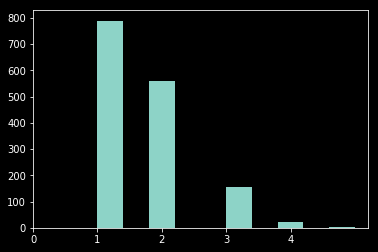

In [20]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.hist(winning_game_pd.winning_goal_count, histtype='stepfilled')
plt.xticks(np.arange(0, max(winning_game_pd.winning_goal_count), 1))
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x106f83cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x106f41128>,
 'fliers': [<matplotlib.lines.Line2D at 0x106f4b7b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x106f41ba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x106f832e8>,
  <matplotlib.lines.Line2D at 0x106f83a90>]}

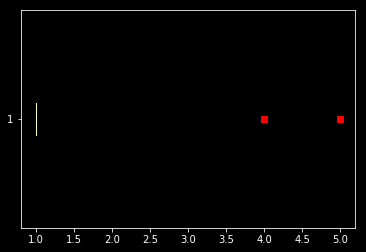

In [9]:
plt.boxplot(winning_game_pd.winning_goal_count, 0, 'rs', 0)

In [ ]:
winning_game_pd.winning_goal_count.quantile(list(np.arange(0, 1, 0.01)))

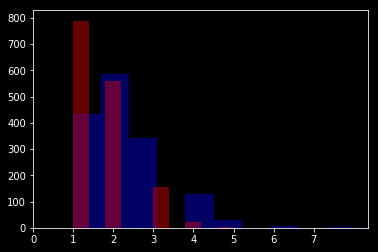

In [15]:
plt.figure()
plt.hist(winning_game_pd.winning_team_score, bins=10, alpha=0.4, histtype='stepfilled', facecolor='blue')
plt.hist(winning_game_pd.winning_goal_count, bins=10, alpha=0.4, histtype='stepfilled', facecolor='red')
plt.xticks(np.arange(0, max(winning_game_pd.winning_team_score), 1))
plt.show()

Comments -> 7. 결승골 관련.ipynb 참고
> 1. 몇번째 득점이 결승골이 가장 많은가 (첫번째 득점, 두번째 등)
2. 결승골 시간대  15분씩 경기를 구분한 경우. 10분씩 구분한 경우
3. 결승골의 위치는  heatmap 활용
4. 신체 부위 구분 가능하면  헤딩골, 슈팅, 등